<a href="https://colab.research.google.com/github/UttaraKet1607/Malarial-Cell-Image-Segmentation/blob/main/Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download iarunava/cell-images-for-detecting-malaria

 99% 666M/675M [00:15<00:00, 53.4MB/s]
100% 675M/675M [00:15<00:00, 45.8MB/s]


In [6]:
! unzip cell-images-for-detecting-malaria.zip

Streaming output truncated to the last 5000 lines.
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_116.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
  inflating: cell_i

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("/content/cell_images"))

['Uninfected', 'cell_images', 'Parasitized']


In [8]:
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils

In [9]:
parasitized_data = os.listdir('/content/cell_images/Parasitized')
print(parasitized_data[:10]) #the output we get are the .png files

uninfected_data = os.listdir('/content/cell_images/Uninfected/')
print('\n')
print(uninfected_data[:10])

['C148P109ThinF_IMG_20151115_112253_cell_222.png', 'C137P98ThinF_IMG_20151005_162648_cell_8.png', 'C46P7ThinF_IMG_20151130_210938_cell_161.png', 'C126P87ThinF_IMG_20151004_105100_cell_134.png', 'C99P60ThinF_IMG_20150918_140900_cell_147.png', 'C99P60ThinF_IMG_20150918_141129_cell_128.png', 'C99P60ThinF_IMG_20150918_141620_cell_16.png', 'C184P145ThinF_IMG_20151203_104153_cell_177.png', 'C59P20thinF_IMG_20150803_112802_cell_171.png', 'C180P141NThinF_IMG_20151201_165528_cell_164.png']


['C173P134NThinF_IMG_20151130_115339_cell_122.png', 'C228ThinF_IMG_20151112_142730_cell_82.png', 'C186P147NThinF_IMG_20151203_150132_cell_16.png', 'C64P25N_ThinF_IMG_20150818_152337_cell_93.png', 'C183P144NThinF_IMG_20151201_223208_cell_78.png', 'C79P40ThinF_IMG_20150817_103303_cell_54.png', 'C235ThinF_IMG_20151112_164918_cell_27.png', 'C115P76ThinF_IMG_20150930_162038_cell_121.png', 'C177P138NThinF_IMG_20151201_142846_cell_5.png', 'C179P140ThinF_IMG_20151127_153521_cell_1.png']


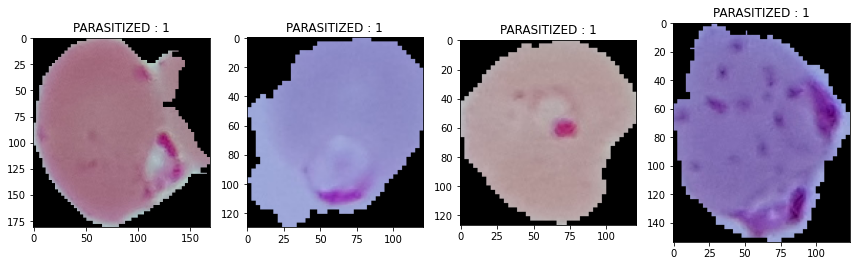

In [10]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('/content/cell_images/Parasitized' + "/" + parasitized_data[i])
    plt.imshow(img)
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

In [11]:
data = []
labels = []
for img in parasitized_data:
    try:
        img_read = plt.imread('/content/cell_images/Parasitized' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in uninfected_data:
    try:
        img_read = plt.imread('/content/cell_images/Uninfected' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

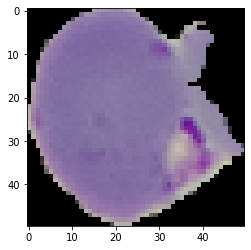

In [12]:
plt.imshow(data[0])
plt.show()

In [13]:
image_data = np.array(data)
labels = np.array(labels)

In [14]:
idx = np.arange(image_data.shape[0])
image_data = image_data[idx]
labels = labels[idx]

In [15]:
image_data.shape, labels.shape

((27558, 50, 50, 3), (27558,))

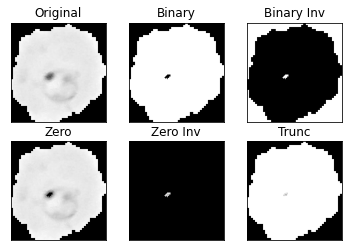

In [16]:
imgpath1 =  "/content/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png"
img = cv2.imread(imgpath1, 0)
th = 0
max_val = 255
    
ret, o1 = cv2.threshold(img, th, max_val, cv2.THRESH_BINARY + cv2.THRESH_OTSU )
ret, o2 = cv2.threshold(img, th, max_val, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU )
ret, o3 = cv2.threshold(img, th, max_val, cv2.THRESH_TOZERO + cv2.THRESH_OTSU )
ret, o4 = cv2.threshold(img, th, max_val, cv2.THRESH_TOZERO_INV + cv2.THRESH_OTSU )
ret, o5 = cv2.threshold(img, th, max_val, cv2.THRESH_TRUNC + cv2.THRESH_OTSU )
    
output = [img, o1, o2, o3, o4, o5]
    
titles = ['Original', 'Binary', 'Binary Inv',
              'Zero', 'Zero Inv', 'Trunc']
    
for i in range(6):
        plt.subplot(2, 3, i+1)
        plt.imshow(output[i], cmap='gray')
        plt.title(titles[i])
        plt.xticks([])
        plt.yticks([])

plt.show()  

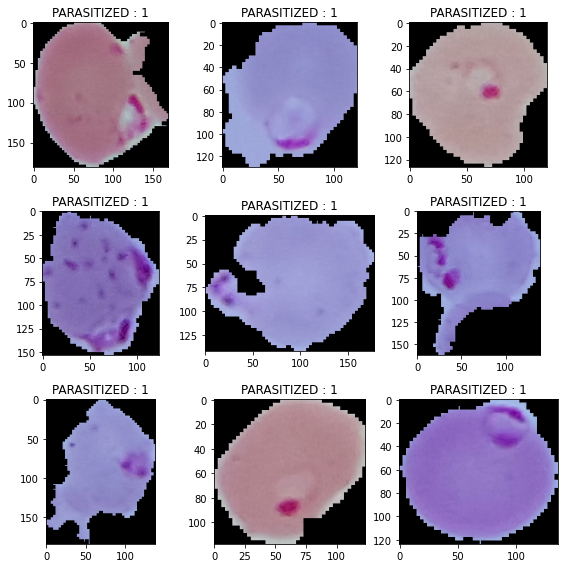

In [28]:
plt.figure(figsize = (8,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = cv2.imread('/content/cell_images/Parasitized' + "/" + parasitized_data[i])
    plt.imshow(img, cmap='gray')
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

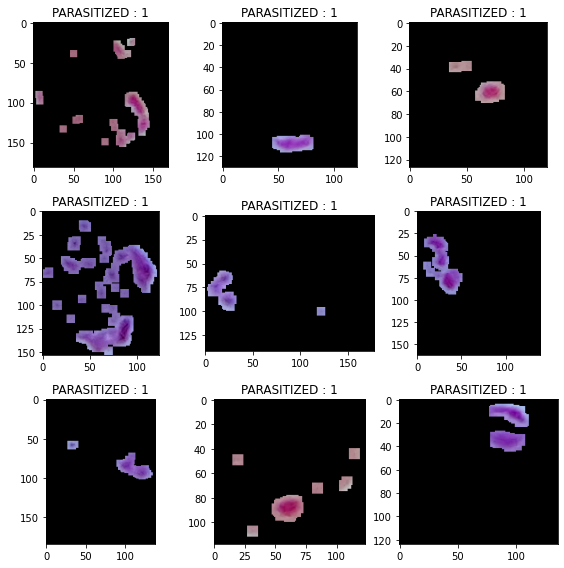

In [22]:
plt.figure(figsize = (8,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    image1 = cv2.imread('/content/cell_images/Parasitized' + "/" + parasitized_data[i])
    image = cv2.imread('/content/cell_images/Parasitized' + "/" + parasitized_data[i],0)
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    img = cv2.filter2D(image, ddepth=-1, kernel=kernel)
    ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_TOZERO_INV+cv2.THRESH_OTSU)
    # noise removal
    kernel = np.ones((3,3),np.uint8)
    #opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
    closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)
    # sure background area
    sure_bg = cv2.dilate(closing,kernel,iterations=4)
    output1 = cv2.bitwise_and(image1, image1, mask = sure_bg)
    plt.imshow(output1, cmap='gray')
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

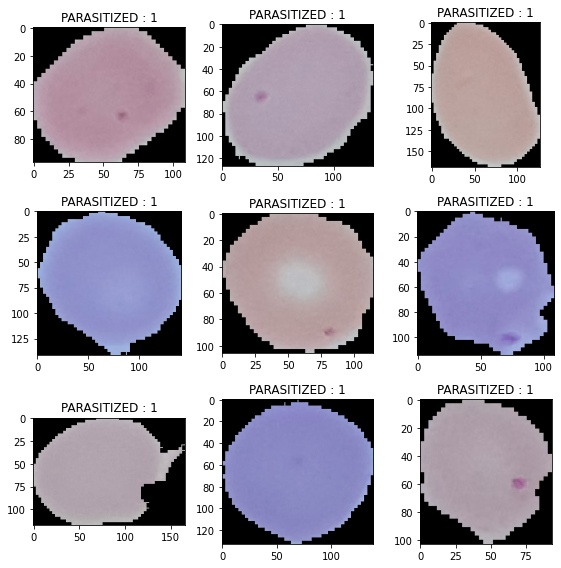

In [29]:
plt.figure(figsize = (8,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = cv2.imread('/content/cell_images/Uninfected' + "/" + uninfected_data[i])
    plt.imshow(img, cmap='gray')
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

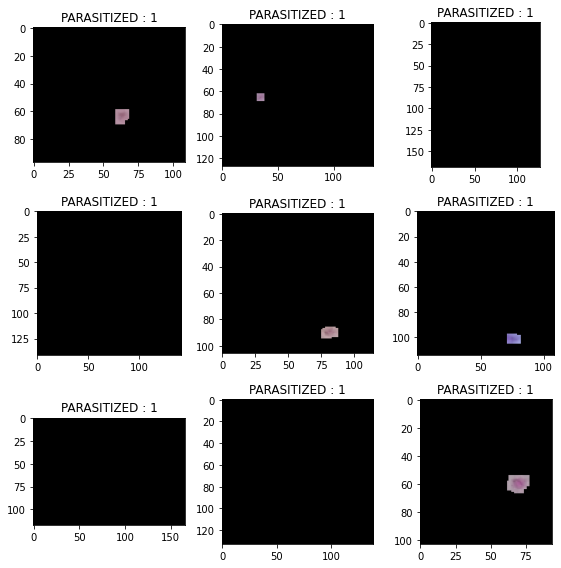

In [30]:
plt.figure(figsize = (8,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    image1 = cv2.imread('/content/cell_images/Uninfected' + "/" + uninfected_data[i])
    image = cv2.imread('/content/cell_images/Uninfected' + "/" + uninfected_data[i],0)
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    img = cv2.filter2D(image, ddepth=-1, kernel=kernel)
    ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_TOZERO_INV+cv2.THRESH_OTSU)
    # noise removal
    kernel = np.ones((3,3),np.uint8)
    #opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
    closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)
    # sure background area
    sure_bg = cv2.dilate(closing,kernel,iterations=3)
    output1 = cv2.bitwise_and(image1, image1, mask = sure_bg)
    plt.imshow(output1, cmap='gray')
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

In [ ]:
import os 
infected_dir = "/content/cell_images/Parasitized_segmented"
os.mkdir(infected_dir) 
uninfected_dir = "/content/cell_images/Uninfected_segmented"
os.mkdir(uninfected_dir) 

In [ ]:
for image in parasitized_data:
  try:
      img = cv2.imread('/content/cell_images/Parasitized' + "/" + image,0)
      kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
      img = cv2.filter2D(img, ddepth=-1, kernel=kernel)
      ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_TOZERO_INV+cv2.THRESH_OTSU)
      # noise removal
      kernel = np.ones((3,3),np.uint8)
      #opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
      closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)
      # sure background area
      sure_bg = cv2.dilate(closing,kernel,iterations=3)
      isWritten = cv2.imwrite('/content/cell_images/Parasitized_segmented' + "/" + image, sure_bg)        
      if isWritten:
	        print('Image is successfully saved as file.')
  except:
    None

In [ ]:
for image in uninfected_data:
  try:
      img = cv2.imread('/content/cell_images/Uninfected' + "/" + image,0)
      kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
      img = cv2.filter2D(img, ddepth=-1, kernel=kernel)
      ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_TOZERO_INV+cv2.THRESH_OTSU)
      # noise removal
      kernel = np.ones((3,3),np.uint8)
      #opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
      closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)
      # sure background area
      sure_bg = cv2.dilate(closing,kernel,iterations=3)
      isWritten = cv2.imwrite('/content/cell_images/Uninfected_segmented' + "/" + image, sure_bg)        
      if isWritten:
	        print('Image is successfully saved as file.')
  except:
    None

In [ ]:
!zip -r /content/cell_images.zip /content/cell_images/

## Cross checks

In [ ]:
import os

list = os.listdir('/content/cell_images/Parasitized') # dir is your directory path
number_files = len(list)
print(number_files)
list = os.listdir('/content/cell_images/Parasitized_segmented') # dir is your directory path
number_files = len(list)
print(number_files)
print(len(parasitized_data))

13780
13779
13780


In [ ]:
list = os.listdir('/content/cell_images/Uninfected') # dir is your directory path
number_files = len(list)
print(number_files)
list = os.listdir('/content/cell_images/Uninfected_segmented') # dir is your directory path
number_files = len(list)
print(number_files)
print(len(uninfected_data))

13780
13779
13780


## Reference code

https://www.analyticsvidhya.com/blog/2021/09/image-segmentation-algorithms-with-implementation-in-python/

https://www.askpython.com/python-modules/opencv-filter2d